# EMAIL SPAM DETECTION WITH MACHINE LEARNING

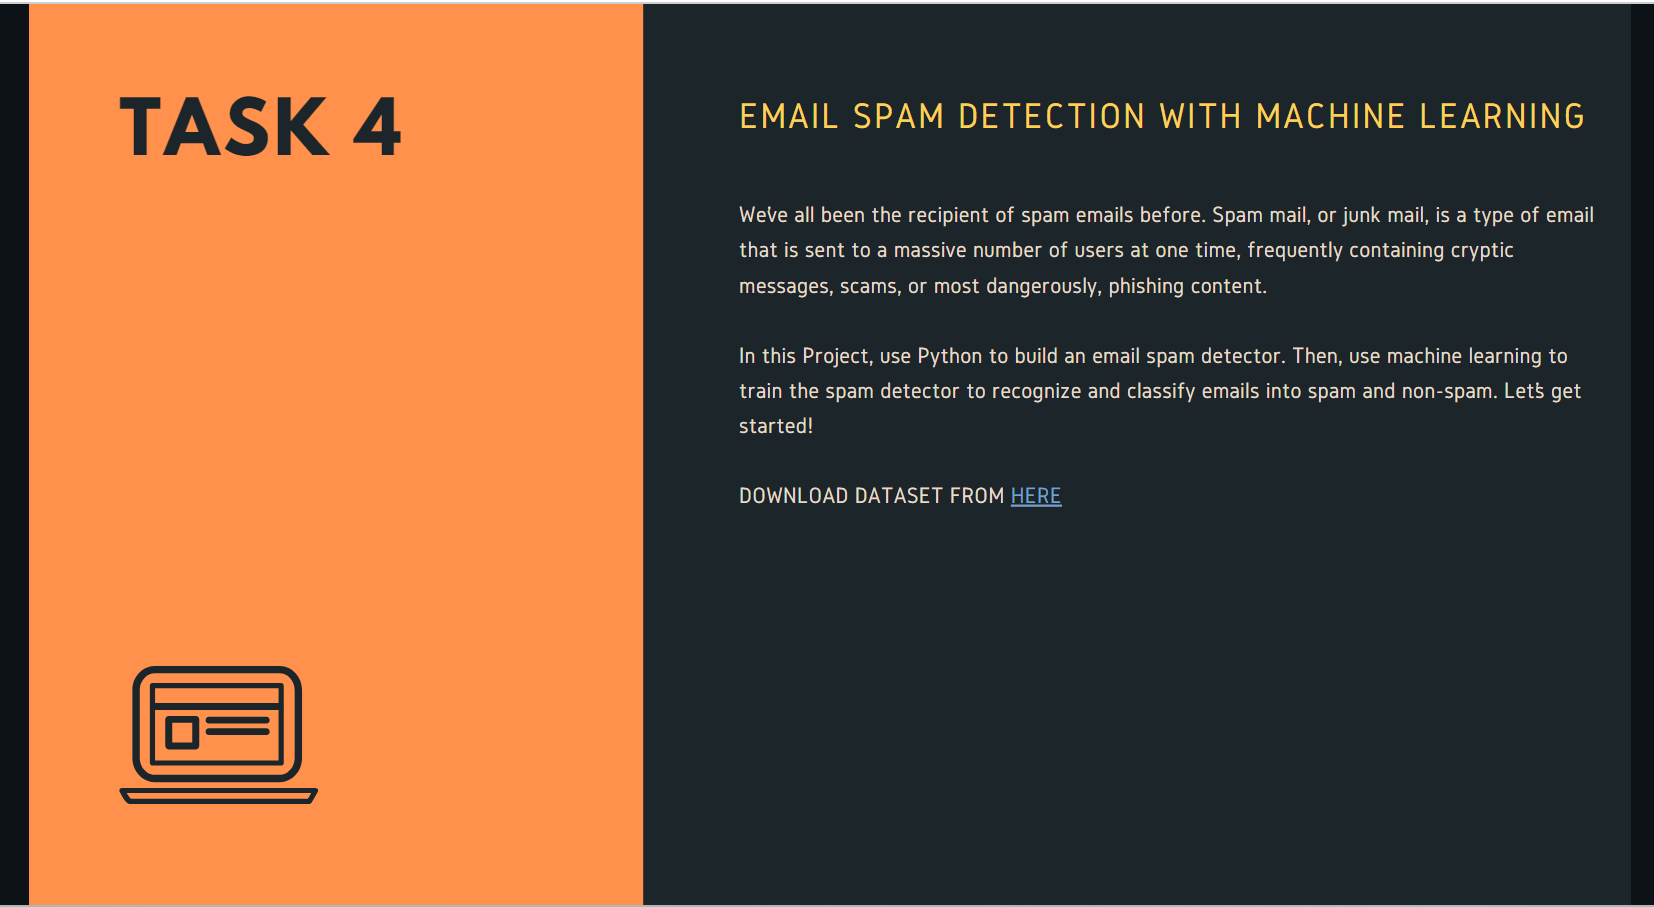

In [1]:
#...............................................IMPORTING THE REQUIRED  LIBRARIES...............................................

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
 

In [3]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Error loading stopwords: <urlopen error [WinError 10053]
[nltk_data]     An established connection was aborted by the software
[nltk_data]     in your host machine>


False

In [4]:
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# LOADING DATASET FROM CSV TO PANDAS DATAFRAME 

In [5]:
raw_data=pd.read_csv('mail_data.csv')

In [6]:
stop_words=stopwords.words('english')

In [7]:
raw_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# REPLACE THE NULL VALUES WITH NULL STRING 

In [8]:
data=raw_data.where((pd.notnull(raw_data)),'')

In [9]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.head()       #DISPLAYS FIRST FIVE ROWS

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.tail()   #DISPLAYS LAST FIVE ROWS

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [12]:
data.describe()    #DISPLAYS THE STATISTICS OF THE DATASET


,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
data.info()   #DISPLAYS INFORMATION ABOUT THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
data.shape    #DISPALYS THE NUMBER OF ROWS AND NUMBER OF COLUMNS

(5572, 2)

In [15]:
#.................................................LABEL ENCODING...............................................................

In [16]:
#LET'S LABEL THE SPAM MAILS AS '0' AND HAM MAILS AS '1'
data.loc[data['Category']=='spam','Category',]=0
data.loc[data['Category']=='ham','Category',]=1 

In [17]:
print(data)

     Category                                            Message
0           1  Go until jurong point, crazy.. Available only ...
1           1                      Ok lar... Joking wif u oni...
2           0  Free entry in 2 a wkly comp to win FA Cup fina...
3           1  U dun say so early hor... U c already then say...
4           1  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567        0  This is the 2nd time we have tried 2 contact u...
5568        1               Will ü b going to esplanade fr home?
5569        1  Pity, * was in mood for that. So...any other s...
5570        1  The guy did some bitching but I acted like i'd...
5571        1                         Rofl. Its true to its name

[5572 rows x 2 columns]


# SEPARATING THE DATA AS TEXT(INPUT) AND LABELS(OUTPUT) 

In [18]:
x=data['Message']
y=data['Category']

In [19]:
#...........................................SPLITTING DATA INTO TRAIN AND TEST..................................................

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [21]:
print(x_train)

1073    Dear U've been invited to XCHAT. This is our f...
3282    I tot it's my group mate... Lucky i havent rep...
3280    Solve d Case : A Man Was Found Murdered On  &l...
3701            Oh...i asked for fun. Haha...take care. ü
5022                                  :-( sad puppy noise
                              ...                        
2621                                            How come?
4548    Hey mate. Spoke to the mag people. We‘re on.  ...
2509                                                Ok...
3239                         Good. No swimsuit allowed :)
1086    FR'NDSHIP is like a needle of a clock. Though ...
Name: Message, Length: 4457, dtype: object


In [22]:
print(y_train)

1073    0
3282    1
3280    1
3701    1
5022    1
       ..
2621    1
4548    1
2509    1
3239    1
1086    1
Name: Category, Length: 4457, dtype: object


In [23]:
print(x_test)

1635    Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...
375     Thanks for your Ringtone Order, Reference T91....
1623    U have a secret admirer who is looking 2 make ...
3756          Im on gloucesterroad what are uup to later?
4868              Okey dokey swashbuckling stuff what oh.
                              ...                        
4501                                    Nvm take ur time.
4079                  Gam gone after outstanding innings.
5016    I think the other two still need to get cash b...
4875                     Wat happened to the cruise thing
4909             I'm in solihull, | do you want anything?
Name: Message, Length: 1115, dtype: object


In [24]:
print(y_test)

1635    0
375     0
1623    0
3756    1
4868    1
       ..
4501    1
4079    1
5016    1
4875    1
4909    1
Name: Category, Length: 1115, dtype: object


In [25]:
print(x_train.shape)

(4457,)


In [26]:
print(y_train.shape)

(4457,)


In [27]:
print(x_test.shape)

(1115,)


In [28]:
print(y_test.shape)

(1115,)


# FEATURE EXTRACTION 

In [29]:
#TRANSFROM THE TEXT DATA TO FEATURED VECTORS SO THAT IT ACN BE USED AS AN INPUT FOR THE LOGISTIC REGRESSION

In [30]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [31]:
x_train_features=feature_extraction.fit_transform(x_train)

In [32]:
print(x_train_features)

  (0, 695)	0.3445444053583906
  (0, 1685)	0.2995917634579244
  (0, 6891)	0.2348797355942262
  (0, 1919)	0.2758547024995943
  (0, 1101)	0.3329479638894165
  (0, 2764)	0.35148383502024283
  (0, 7405)	0.40499163856795917
  (0, 3616)	0.3553351171048184
  (0, 7047)	0.26356992611865304
  (0, 2123)	0.25714589102250457
  (1, 3952)	0.29783597067734613
  (1, 4604)	0.24420890034966508
  (1, 6709)	0.22525702548448198
  (1, 7181)	0.2648343798616784
  (1, 5553)	0.25484687168205333
  (1, 3262)	0.3299684915073807
  (1, 4143)	0.3482492035912741
  (1, 4267)	0.3713263208148247
  (1, 3154)	0.4249533911425057
  (1, 6791)	0.34235290111918537
  (2, 1458)	0.1477457117966018
  (2, 5450)	0.13114793692041862
  (2, 3519)	0.13660202348083714
  (2, 4525)	0.14428912674036348
  (2, 1053)	0.15743031656030834
  :	:
  (4453, 4452)	0.21435125212774545
  (4453, 4267)	0.2529067156001871
  (4454, 4771)	1.0
  (4455, 919)	0.6705971956119722
  (4455, 6481)	0.6705971956119722
  (4455, 3084)	0.31717314273865777
  (4456, 1892)	0.

In [33]:
x_test_features=feature_extraction.transform(x_test)

In [34]:
print(x_test_features)

  (0, 7397)	0.1356806204910478
  (0, 6914)	0.14580697442149412
  (0, 6888)	0.23537518151099018
  (0, 6766)	0.17753838869157287
  (0, 6765)	0.3208880435882152
  (0, 6722)	0.22441720186850916
  (0, 6721)	0.22441720186850916
  (0, 5678)	0.19472643229680753
  (0, 5110)	0.21664239158176948
  (0, 4673)	0.15309482192761983
  (0, 4522)	0.23537518151099018
  (0, 3029)	0.23537518151099018
  (0, 3026)	0.19790960165254887
  (0, 2628)	0.23537518151099018
  (0, 2472)	0.21664239158176948
  (0, 2368)	0.23537518151099018
  (0, 816)	0.23537518151099018
  (0, 647)	0.36957682310905854
  (0, 545)	0.20151838142854211
  (0, 311)	0.14532001164088018
  (1, 7219)	0.21104786811896692
  (1, 6969)	0.29573988123396905
  (1, 6625)	0.2298825895251044
  (1, 5869)	0.2862000212836158
  (1, 5631)	0.2698262904405102
  :	:
  (1109, 1874)	0.2666065028182893
  (1109, 1831)	0.2353300181410649
  (1109, 1615)	0.19690084819964424
  (1109, 1402)	0.2253526259347535
  (1109, 1136)	0.24453458631255504
  (1109, 775)	0.311816761572087

# CONVERTING y_train, y_test VALUES AS INTEGERS 

In [35]:
y_train_features=y_train.astype('int')

In [36]:
y_test_features=y_test.astype('int')

In [37]:
y_train_features

1073    0
3282    1
3280    1
3701    1
5022    1
       ..
2621    1
4548    1
2509    1
3239    1
1086    1
Name: Category, Length: 4457, dtype: int32

In [38]:
y_test_features

1635    0
375     0
1623    0
3756    1
4868    1
       ..
4501    1
4079    1
5016    1
4875    1
4909    1
Name: Category, Length: 1115, dtype: int32

#  TRAINING THE MODEL USING LOGISTIC REGRESSION 

In [39]:
model=LogisticRegression()
model.fit(x_train_features,y_train_features)

LogisticRegression()

In [40]:
pred1=model.predict(x_train_features)
print(accuracy_score(y_train_features,pred1)*100)

96.76912721561588


In [41]:
pred2=model.predict(x_test_features)
print(accuracy_score(y_test_features,pred2)*100)

96.14349775784753


In [42]:
input1=["Hurry Up! Only few left grab your choice"]

In [43]:
input_features=feature_extraction.transform(input1)
prediction=model.predict(input_features)

In [44]:
print(prediction)

[1]


In [45]:
if(prediction==1):
    print("HAM MAIL")
else:
    print("SPAM MAIL")


HAM MAIL


#  THANK YOU 